# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — общая площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

<h1>Интерактивное оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Открытие-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла с данными и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Работа-с-типами-данных" data-toc-modified-id="Работа-с-типами-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с типами данных</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Работа-с-редкими-и-выбивающимися-значениями" data-toc-modified-id="Работа-с-редкими-и-выбивающимися-значениями-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Работа с редкими и выбивающимися значениями</a></span></li></ul></li><li><span><a href="#Добавление-в-таблицу-новых-столбцов-с-данными" data-toc-modified-id="Добавление-в-таблицу-новых-столбцов-с-данными-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление в таблицу новых столбцов с данными</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-и-описание-данных" data-toc-modified-id="Изучение-и-описание-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение и описание данных</a></span></li><li><span><a href="#Изучение-скорости-продажи-квартир-по-данным-столбца-days_exposition" data-toc-modified-id="Изучение-скорости-продажи-квартир-по-данным-столбца-days_exposition-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение скорости продажи квартир по данным столбца <em>days_exposition</em></a></span></li><li><span><a href="#Изучение-факторов,-которые-вляют-на-стоимость-квартиры" data-toc-modified-id="Изучение-факторов,-которые-вляют-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучение факторов, которые вляют на стоимость квартиры</a></span></li><li><span><a href="#Выявление-средней-цены-за-квадратный-метр-в-десяти-самых-популярных-населённых-пунктах" data-toc-modified-id="Выявление-средней-цены-за-квадратный-метр-в-десяти-самых-популярных-населённых-пунктах-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выявление средней цены за квадратный метр в десяти самых популярных населённых пунктах</a></span></li><li><span><a href="#Изучение-влияния-близости-к-центру-города-на-стоимость" data-toc-modified-id="Изучение-влияния-близости-к-центру-города-на-стоимость-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение влияния близости к центру города на стоимость</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Открытие файла с данными и изучение общей информации 

Испортируем библиотеки и открываем датасет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем первые строчки и изучим данные таблицы, а также построим гистограммы по значениям отдельных столбцов.

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

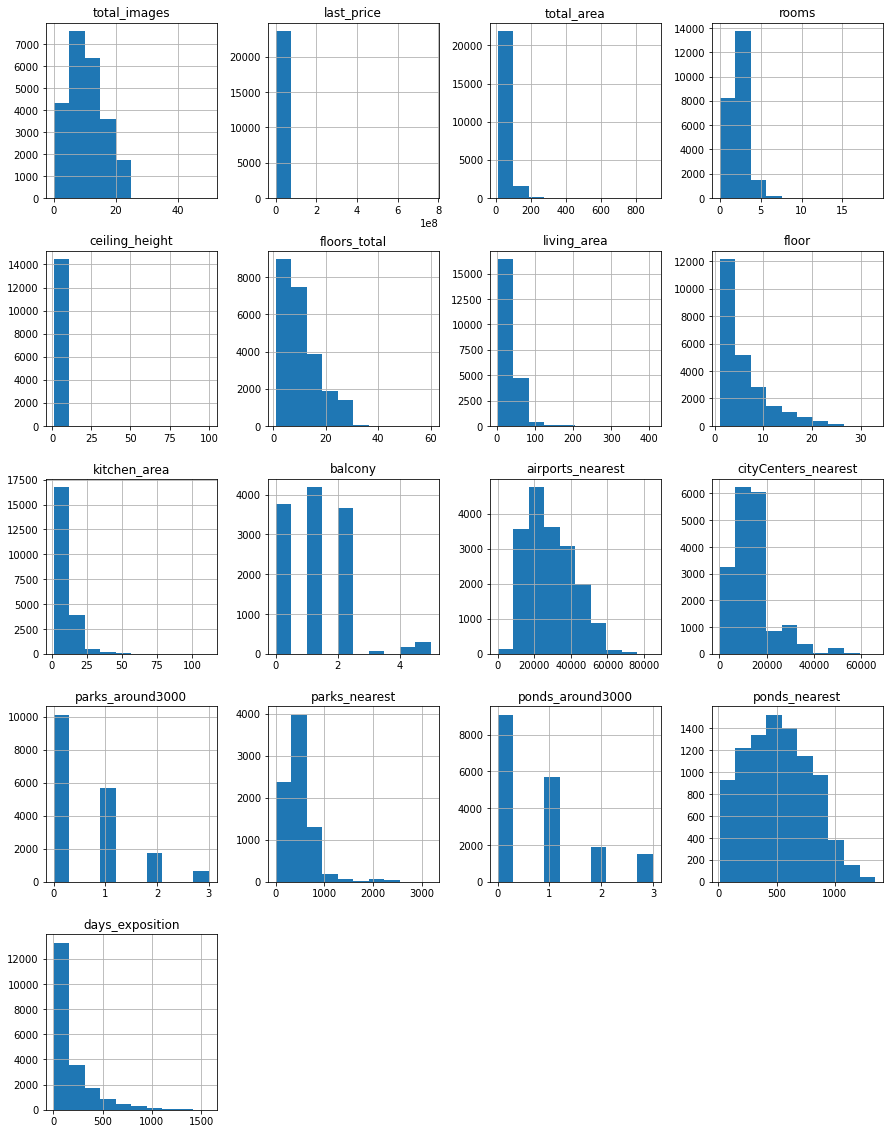

In [5]:
data.hist(figsize=(15, 20));

В нашем распоряжении есть таблица данных, состоящая из 23699 строк и 22 столбцов. Первый взгляд на данные говорит о том, что в данных есть пропуски, аномальные значения и неверные типы данных, эти явления мы исправим на этапе предобработки данных.

## Предобработка данных

### Работа с пропусками

Определим количество и долю пропущенных значений в каждом столбце.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


**Возможные причины появления пропусков в данных** могут быть связаны либо с тем, что пользователь, разместивший объявление, не предоставил эти данные, либо параметр, описываемый в столбце, отсутствует у объекта недвижимости.

В столбцах *balcony*, *parks_around3000*, *ponds_around3000* отсуствие значения скорее всего говорит об отсутствии этого параметра у объекта недвижимости, поэтому заменим пустые значения на 0.

In [8]:
data['balcony'].fillna(0, inplace=True)
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

Пропуски в столбце с названиями населённых пунктов заменим на "нет данных".

In [9]:
data['locality_name'].fillna('нет данных', inplace=True)

Заполним пропуски в столбцах *living_area* и *kitchen_area*.

In [11]:
# находим коэффициент отношения общей площади к жилой площади и с его помощью заполняем пропуски в жилой площади
coeff_living_area = data['total_area'].median() / data['living_area'].median()
data['living_area'].fillna(data['total_area'] / coeff_living_area, inplace=True)

# находим коэффициент отношения нежилой площади к площади кухни и с его помощью заполняем пропуски в площади кухни 
coeff_non_living_area = (data['total_area'] - data['living_area']).median() / data['kitchen_area'].median()
data['kitchen_area'].fillna((data['total_area'] - data['living_area']) / coeff_non_living_area, inplace=True)

Пропуски в столбце *ceiling_height* нужно заменить медианным значением высоты потолка, однако мы сделаем это позднее, когда убедимся, что в этом столбце нет аномальных значений.

Пропуски в остальных столбцах мы оставим, так как пропуски - это важный сигнал, который нужно учитывать.
Убедимся, что пропущенные значения в столбцах, над которыми мы провели работу, заполнены.

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Работа с типами данных

В столбцах *last_price*, *balcony*, *parks_around3000*, *ponds_around3000* для удобства восприятия и работы заменим значения на целочисленные. 

In [14]:
data['last_price'] = data['last_price'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

У нас также есть столбец с датой и временем публикации объявления, приведём его к типу Datetime. Это нужно для того, чтобы открыть возможности pandas для работы с датами.

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Работа с дубликатами

Убедимся, что в таблице нет явных строчек-дубликатов.

In [16]:
data.duplicated().sum()

0

В нашем датасете есть столбец с названиями населённых пунктов. В нём могут содержаться неявные дубликаты, так как зачастую одни и те же населённые пункты могут иметь слегка разное написание. Выведем уникальные значения этого столбца и проанализируем их, а также посчитаем их количество.

In [17]:
locality_name_quantity = len(data['locality_name'].unique())
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Среди уникальных значений этого столбца много дубликатов, связанных с двумя вариантами написания слова *посёлок/поселок*.
Решим эту проблему, приведя это слово к единому написанию через букву "е".

In [18]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Приведём к единому написанию другие неявные дубликаты.

In [19]:
good_locality_name = [
    'поселок при железнодорожной станции Вещево', 
    'поселок городского типа Рощино', 
    'поселок городского типа Рябово', 
    'поселок городского типа Большая Ижора', 
    'поселок городского типа Советский', 
    'поселок городского типа Лесогорский', 
    'поселок Лесное',
]
bad_locality_name = [
    'поселок станции Вещево', 
    'городской поселок Рощино', 
    'поселок Рябово', 
    'городской поселок Большая Ижора', 
    'городской поселок Советский', 
    'городской поселок Лесогорский', 
    'коттеджный поселок Лесное'
]

data['locality_name'].replace(bad_locality_name, good_locality_name, inplace=True)
locality_name_quantity_filtered = len(data['locality_name'].unique())
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

В списке уникальных значений есть посёлок Мурино и Мурино. Это одна и та же локация, которая сначала была посёлком, а потом стала городом, эти два значения мы оставим как есть, чтобы иметь возможность наблюдать разницу в показателях до того, как посёлок стал городом, и после.

Оценим изменения в столбце *locality_name*.

In [20]:
print(
    f'''Кол-во уникальных значений до внесения исправлений: {locality_name_quantity}.
Кол-во уникальных значений после внесения исправлений: {locality_name_quantity_filtered}.'''
)

Кол-во уникальных значений до внесения исправлений: 365.
Кол-во уникальных значений после внесения исправлений: 324.


### Работа с редкими и выбивающимися значениями

Проверим столбцы датафрейма на аномальные значения и устраним их.

In [21]:
quantity_original = data.shape[0]
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.624296,5.892358,10.479996,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.381873,4.885249,6.064139,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.173077,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вызывают сомнения наличие настолько высокого максимального значения (max=100 при Q3 = 2.8) в столбце с высотой потолков ceiling_height. Посмотрим на значения столбца с помощью диаграммы размаха. 

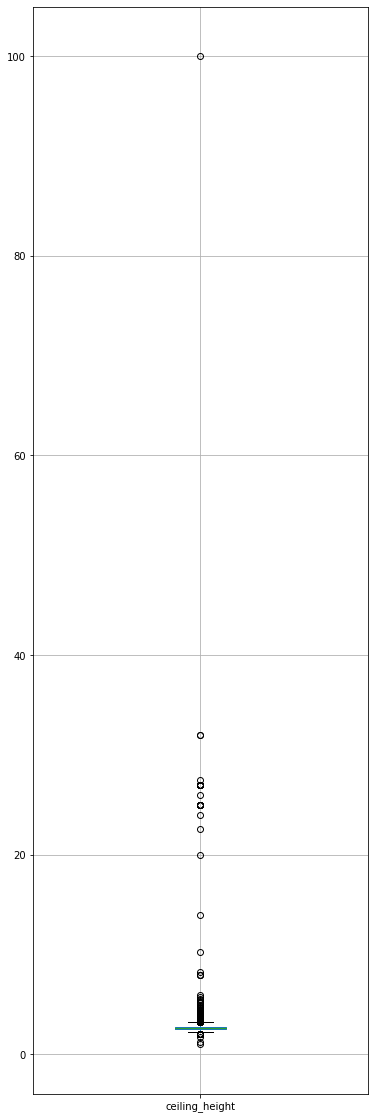

In [22]:
data.boxplot('ceiling_height', figsize=(6, 20), grid=True);

Уменьшим границы графика, чтобы увидеть границы нормальных значений.

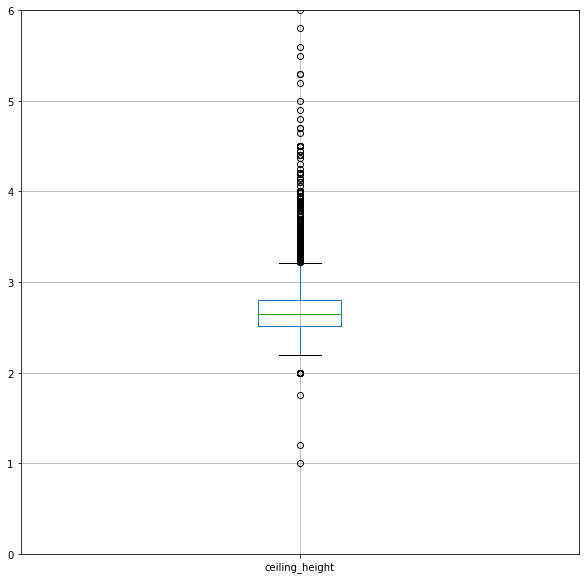

In [23]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 6)
data.boxplot('ceiling_height');

Мы видим, высота потолков до 4.5 метров встречается всё ещё довольно часто, хотя мы и вышли за пределы диаграммы размаха, это говорит о том, что такая высота потолков всё ещё встречается. Рассмотрим уникальные сильно выбивающиеся значения.

In [24]:
data.query('ceiling_height < 2.1 or ceiling_height > 6')['ceiling_height'].unique()

array([ 25.  ,   2.  ,  32.  ,   8.  ,  27.  ,  24.  ,  26.  ,   1.2 ,
         8.3 ,  14.  ,   1.75,  20.  ,  22.6 ,  27.5 ,  10.3 ,   1.  ,
       100.  ])

По некоторым из них можно сделать вывод, что вместо дробного числа было сохранено целое число. Исправим эти значения.

In [25]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 40),'ceiling_height'] = data['ceiling_height'] / 10

Природа остальных выбивающихся значения не так ясна, поэтому заменим эти значения, а также отсутсвующие значения, на медианное значение отфильтрованной высоты потолков.

In [26]:
data.loc[(data['ceiling_height'] < 2.1) | (data['ceiling_height'] > 6) | (data['ceiling_height'].isna()), 'ceiling_height'] = \
data.query('2 <= ceiling_height <= 6')['ceiling_height'].median()

С помощью метода describe(), применённого выше, мы также могли заметить слишком низкое минимальное значение столбца last_price. Проверим несколько минимальных значений этого столбца.

In [27]:
data.sort_values('last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.000000,25,NaN,...,40.50,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
17456,7,430000,30.4,2019-04-22,1,2.65,2.0,16.000000,1,NaN,...,6.00,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN
14911,5,430000,54.0,2018-06-26,2,2.65,3.0,31.153846,3,NaN,...,9.45,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
16274,18,440000,40.0,2018-07-10,1,2.65,5.0,23.076923,1,NaN,...,7.00,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
17676,0,450000,36.5,2018-02-01,1,2.65,5.0,17.300000,4,NaN,...,8.50,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.0


Стоимость объекта недвижимости под индексом 8793 явно указана неверно, поэтому мы удалим эту строку.

In [28]:
data = data.query('last_price > 100000')

В столбце *airport_nearest* с расстоянием до аэропорта есть одно аномальное значение 0. Уберём строку с этим значением.

In [29]:
data.sort_values('airports_nearest')['airports_nearest'].head() 

21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64

In [30]:
data = data.query('airports_nearest != 0')

В столбце *rooms* есть минимальное значение 0, что довольно странно, рассмотрим примеры таких объявлений.

In [31]:
pd.set_option('display.max_columns', None)
data.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,2.65,24.0,15.500000,2,NaN,True,False,4.756818,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000,25.00,2017-09-27,0,2.65,14.0,17.000000,1,NaN,False,True,3.309091,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000,27.11,2018-03-12,0,2.65,17.0,24.750000,4,NaN,True,False,0.976182,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000,34.40,2017-03-28,0,2.65,26.0,24.300000,19,NaN,False,True,4.177727,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000,25.00,2019-02-20,0,2.65,10.0,14.423077,7,NaN,True,False,4.375000,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0


In [32]:
data.query('rooms == 0')['total_area'].sort_values(ascending=False).head(10)

19392    371.00
20082     98.40
3458      73.60
21227     71.00
13613     58.40
10008     44.20
15319     43.30
7237      42.63
16130     42.10
9052      38.30
Name: total_area, dtype: float64

Значение 0 есть у объектов, в которых явно должно быть больше одной комнаты, в связи с чем напишем функцию, которая заменит значения 0 в столбце на число комнат, выведеное по среднему значению общей площади в зависимости от количества комнат.

In [33]:
rooms_median_square = data.query('0 < rooms < 10').pivot_table(index='rooms', values='total_area', aggfunc='median')
rooms_median_square

,total_area
rooms,
1,36.56
2,53.00
3,73.00
4,99.30
5,146.45
6,184.30
7,214.00
8,235.70
9,300.95


In [34]:
def rooms_counter(area):
    return rooms_median_square.iloc[(rooms_median_square['total_area'] - area).abs().argsort()].index[0]
          
data.loc[data['rooms'] == 0, 'rooms'] = data.loc[data['rooms'] == 0, 'rooms'].apply(rooms_counter)

И наконец, избавимся от аномально высоких значений стобцов *total_area* и *rooms*. У нас нет доказательств, что эти значения неверны, однако в этом исследовании мы будем считать коэффициент линейной корреляции Пирсона, который очень подвержен выбросам, которые искажают результат.

In [35]:
data = data.query('total_area <= 500 & rooms <= 11')

Проверим, сколько данных было удалено после предобработки.

In [36]:
quantity_filtered = data.shape[0]
print(f'''Кол-во строк до обработки данных: {quantity_original}
Кол-во строк после обработки данных: {quantity_filtered}
Удален {quantity_filtered / quantity_original:.0f}% данных''')

Кол-во строк до обработки данных: 23699
Кол-во строк после обработки данных: 23686
Удален 1% данных


## Добавление в таблицу новых столбцов с данными

Для упрощения анализа добавим в таблицу следующие столбцы с данными.

In [37]:
# Цена одного квадратного метра
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['price_per_sqm'] = data['price_per_sqm'].astype('int64')

# День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# Месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

# Год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

# Тип этажа квартиры
data['floor_type'] = 'другой'
data['floor_type'] = data['floor_type'].where(data['floor'] != data['floors_total'], 'последний')
data['floor_type'] = data['floor_type'].where(data['floor'] != 1, 'первый')

# Расстояние до центра города в километрах
data['city_center_km'] = (data['cityCenters_nearest'] / 1000).round()


## Исследовательский анализ данных

### Изучение и описание данных

In [38]:
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23686.000000,23686.000000,23686.000000
mean,60.137287,34.504688,10.462164
std,34.072360,21.611544,5.970182
min,12.000000,2.000000,0.000000
25%,40.000000,19.000000,7.000000
50%,52.000000,30.000000,9.000000
75%,69.732500,42.115385,12.000000
max,500.000000,347.500000,107.000000


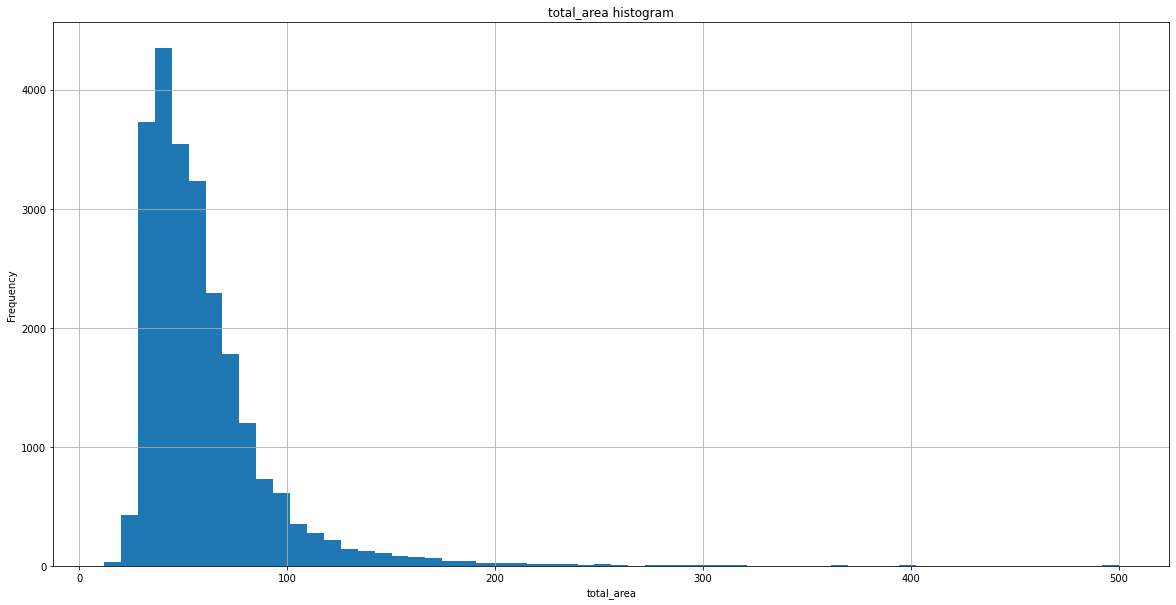

In [39]:
plt.title('total_area histogram')
plt.ylabel('Frequency')
plt.xlabel('total_area')
data['total_area'].hist(bins=60, figsize=(20,10));

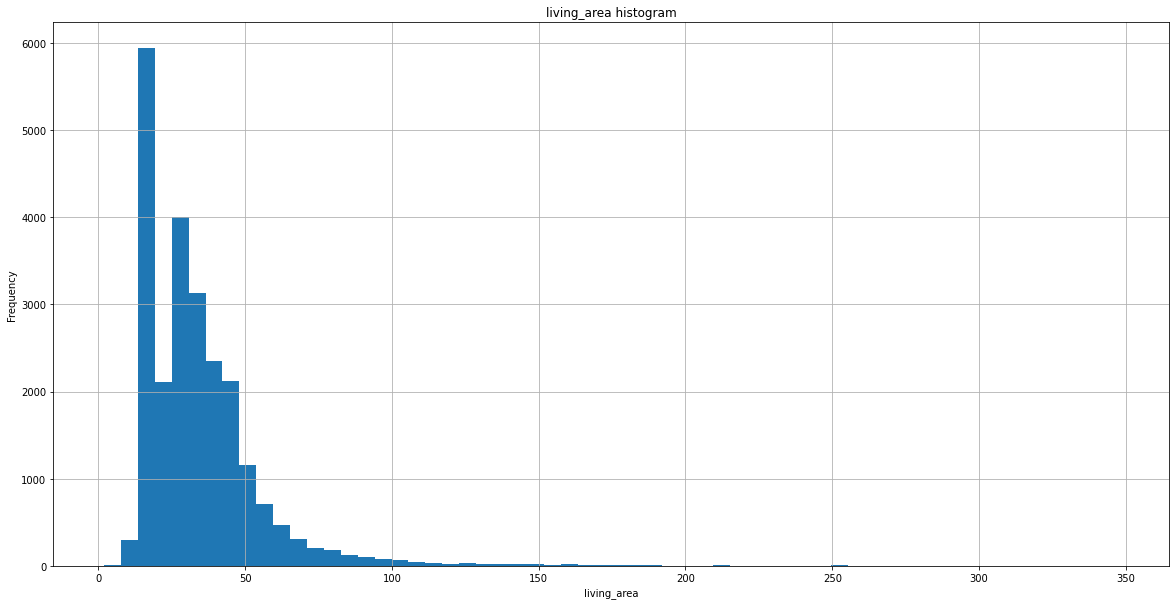

In [40]:
plt.title('living_area histogram')
plt.ylabel('Frequency')
plt.xlabel('living_area')
data['living_area'].hist(bins=60, figsize=(20,10));

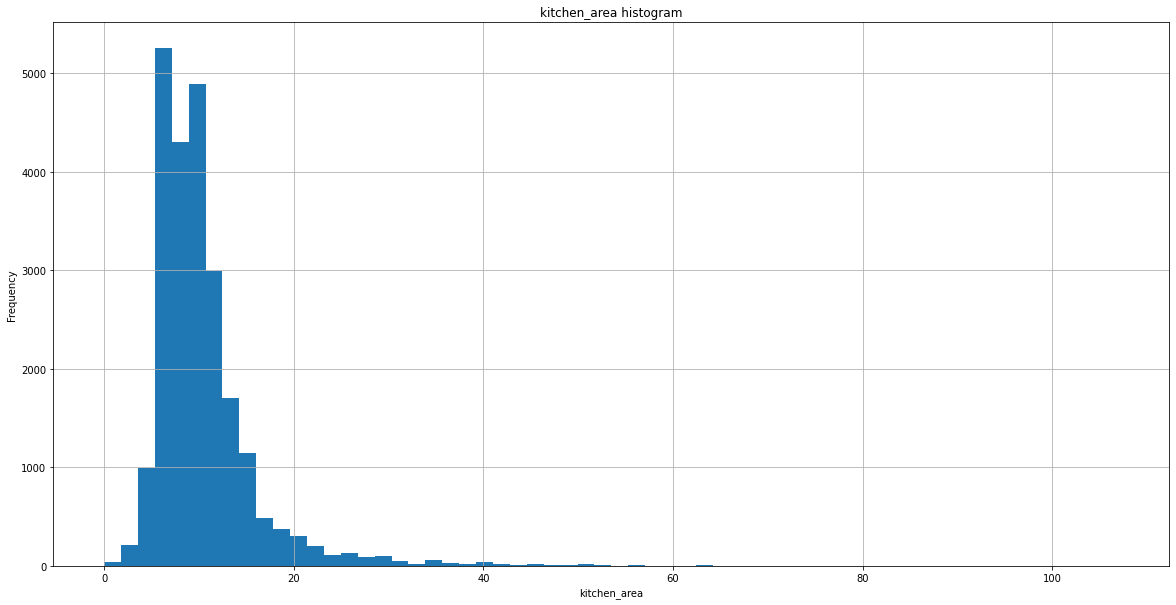

In [41]:
plt.title('kitchen_area histogram')
plt.ylabel('Frequency')
plt.xlabel('kitchen_area')
data['kitchen_area'].hist(bins=60, figsize=(20,10));

Медианная общая площадь квартир составляет 52 кв. метра. Большинство значений приходятся на интервал от 40 до 70 кв метров. Медиана жилой площади - 30 кв. метров, большинство значений на интервале от 20 до 50 кв метров. Медиана площади кухни 9,1 кв метров, большинство значений на интервале от 6 до 14 метров.

In [42]:
data['last_price'].describe()

count    2.368600e+04
mean     6.489392e+06
std      1.027956e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

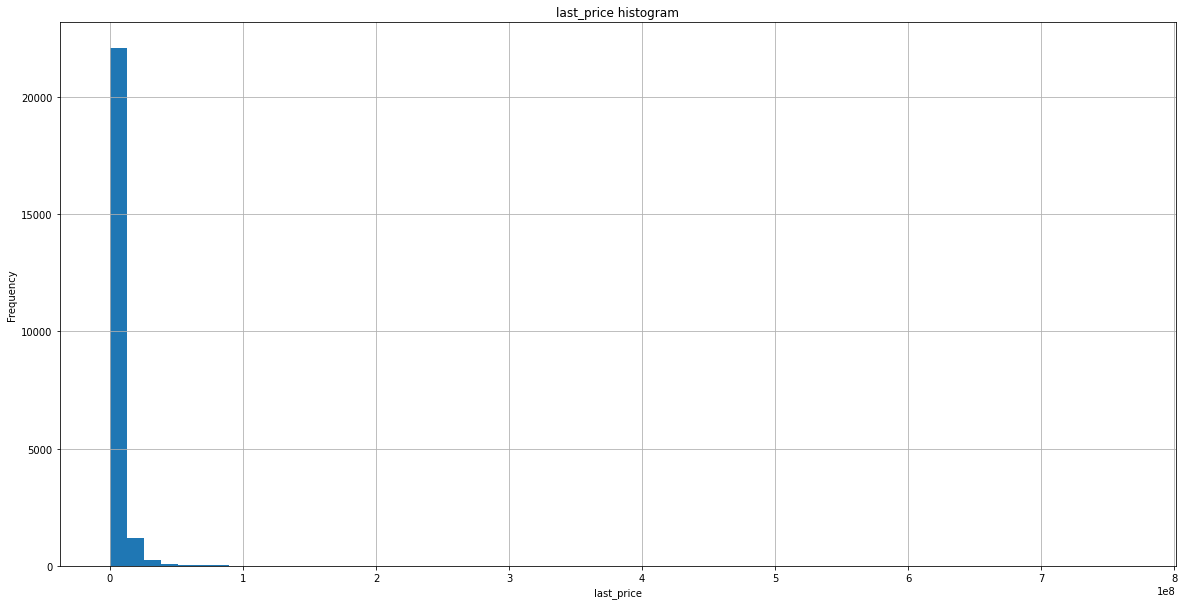

In [43]:
plt.title('last_price histogram')
plt.ylabel('Frequency')
plt.xlabel('last_price')
data['last_price'].hist(bins=60, figsize=(20,10));

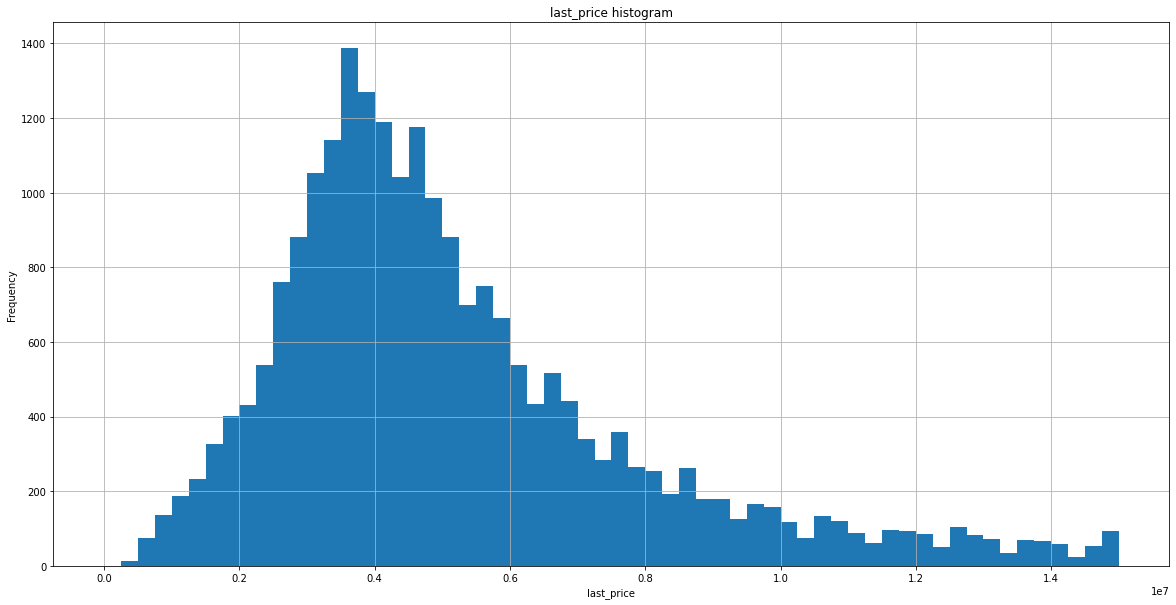

In [44]:
# так как в цене есть очень выбивающиеся значения, для наглядности ограничем гистограмму ценой 15 млн.
plt.title('last_price histogram')
plt.ylabel('Frequency')
plt.xlabel('last_price')
data['last_price'].hist(bins=60, figsize=(20,10), range=(0, 10**7*1.5));

Медианная стоимость квартиры составляет 4,65 млн. По гистограмме мы видим, что большинство квартир имеют стоимость от 2 млн до 7 млн. Минимальная цена составляет 430 тыс, а максимальная - 763 млн.

In [45]:
data['rooms'].describe()

count    23686.000000
mean         2.074770
std          1.043746
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

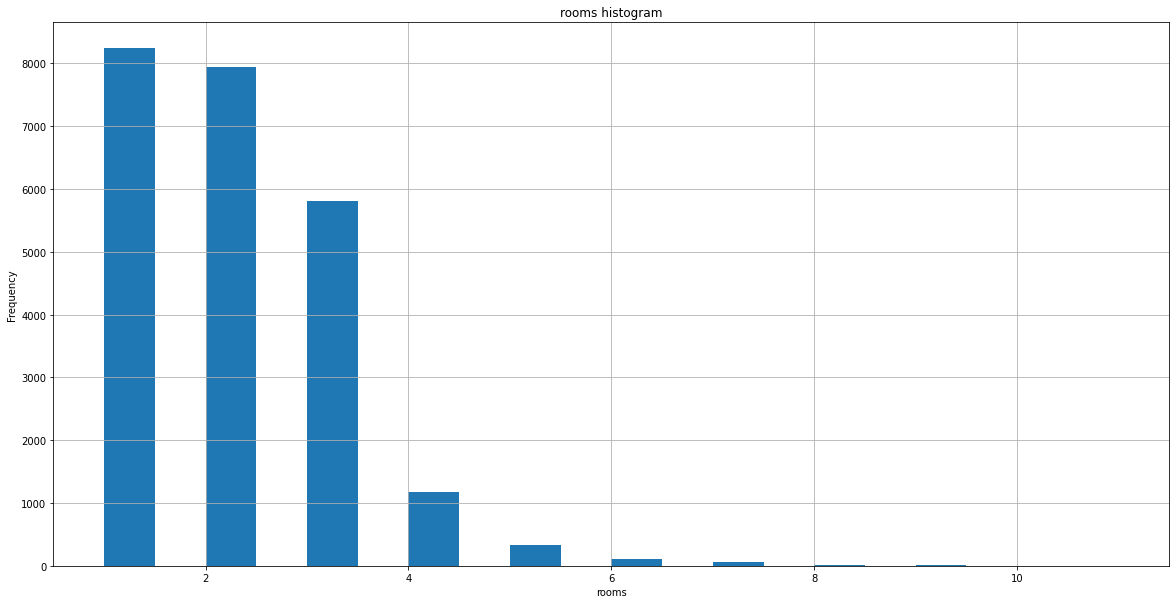

In [46]:
plt.title('rooms histogram')
plt.ylabel('Frequency')
plt.xlabel('rooms')
data['rooms'].hist(bins=20, figsize=(20,10));

Медианное количество комнат составялет 2, при этом большинство объектов имеет от 1 до 3 комнат. Максимальное значение числа комнат - 11.

In [47]:
data['ceiling_height'].describe()

count    23686.000000
mean         2.696972
std          0.220062
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

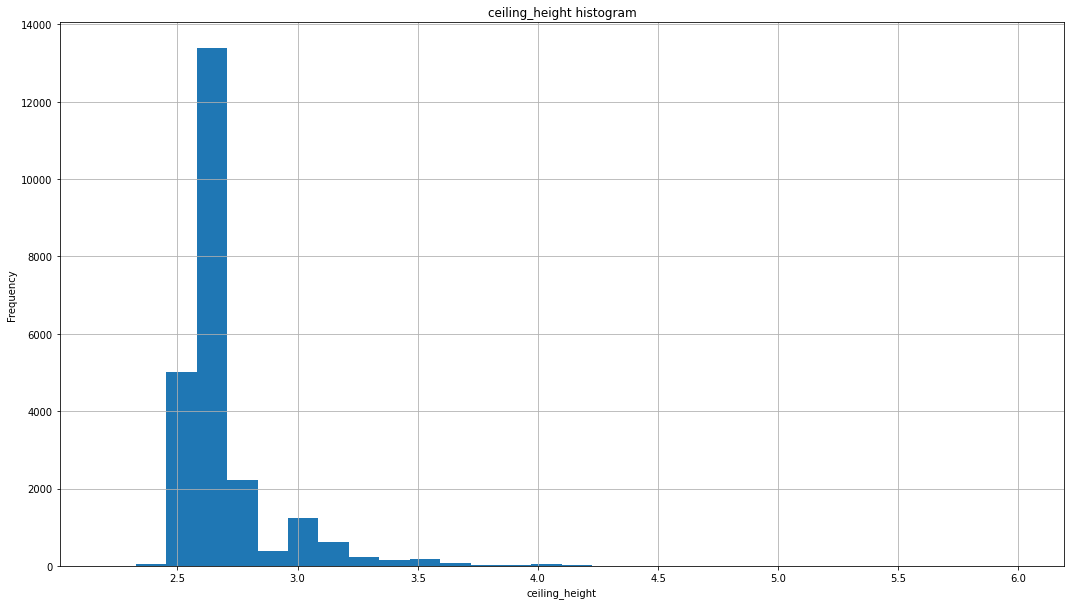

In [48]:
plt.title('ceiling_height histogram')
plt.ylabel('Frequency')
plt.xlabel('ceiling_height')
data['ceiling_height'].hist(bins=30, figsize=(18,10));

Медианная высота потолков составляет 2.65 метра, в большинстве квартир высота потолка составляет от 2.6 до 2.8 метров.

In [49]:
data[['floor', 'floors_total']].describe()

,floor,floors_total
count,23686.000000,23600.000000
mean,5.891708,10.675042
std,4.883136,6.596623
min,1.000000,1.000000
25%,2.000000,5.000000
50%,4.000000,9.000000
75%,8.000000,16.000000
max,33.000000,60.000000


In [50]:
data['floor_type'].value_counts()

другой       17439
последний     3330
первый        2917
Name: floor_type, dtype: int64

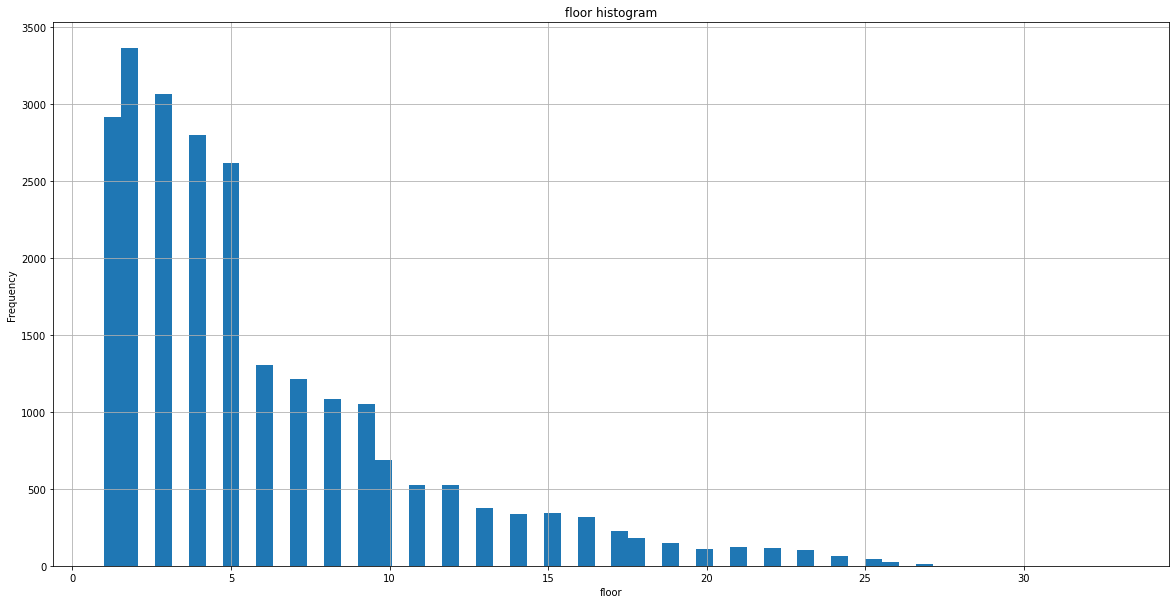

In [51]:
plt.title('floor histogram')
plt.ylabel('Frequency')
plt.xlabel('floor')
data['floor'].hist(bins=60, figsize=(20,10));

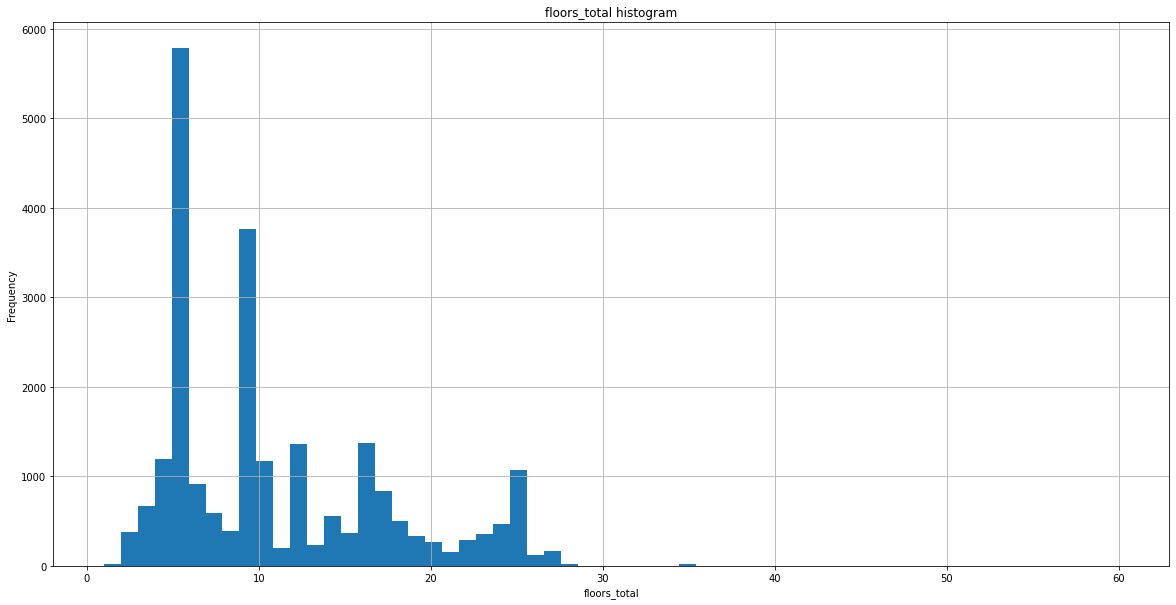

In [52]:
plt.title('floors_total histogram')
plt.ylabel('Frequency')
plt.xlabel('floors_total')
data['floors_total'].hist(bins=60, figsize=(20,10));

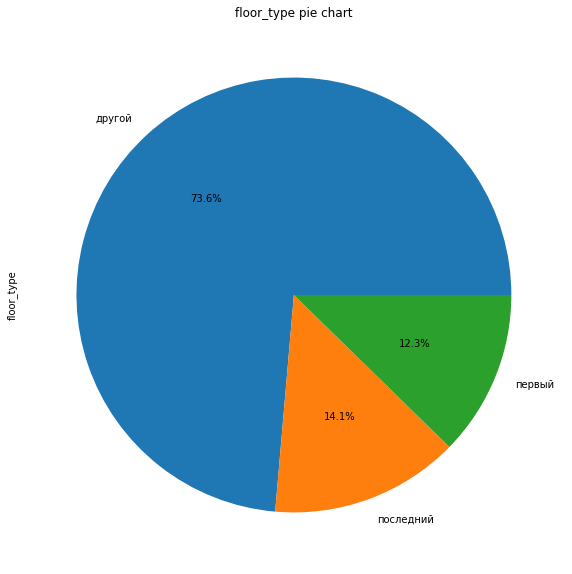

In [53]:
data['floor_type'].value_counts().plot(
    y='floor_type', 
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(10, 10), 
    title='floor_type pie chart'
);

Медианное значение этажа квартиры составляет 4, минимальное значение - 1, максимальное - 33. При этом медианная количество этажей в домах их объявлений - 9 этажей, минимальное значение - 1, максимальное - 60. Квартира располагается на первом этаже в 12.3% объявлений, на последнем - в 14.1% объявлений.

In [54]:
data[['cityCenters_nearest', 'airports_nearest', 'parks_nearest']].describe().astype(int)

,cityCenters_nearest,airports_nearest,parks_nearest
count,18167,18145,8073
mean,14196,28796,490
std,8607,12632,342
min,181,6450,1
25%,9239,18582,288
50%,13105,26729,454
75%,16293,37277,612
max,65968,84869,3190


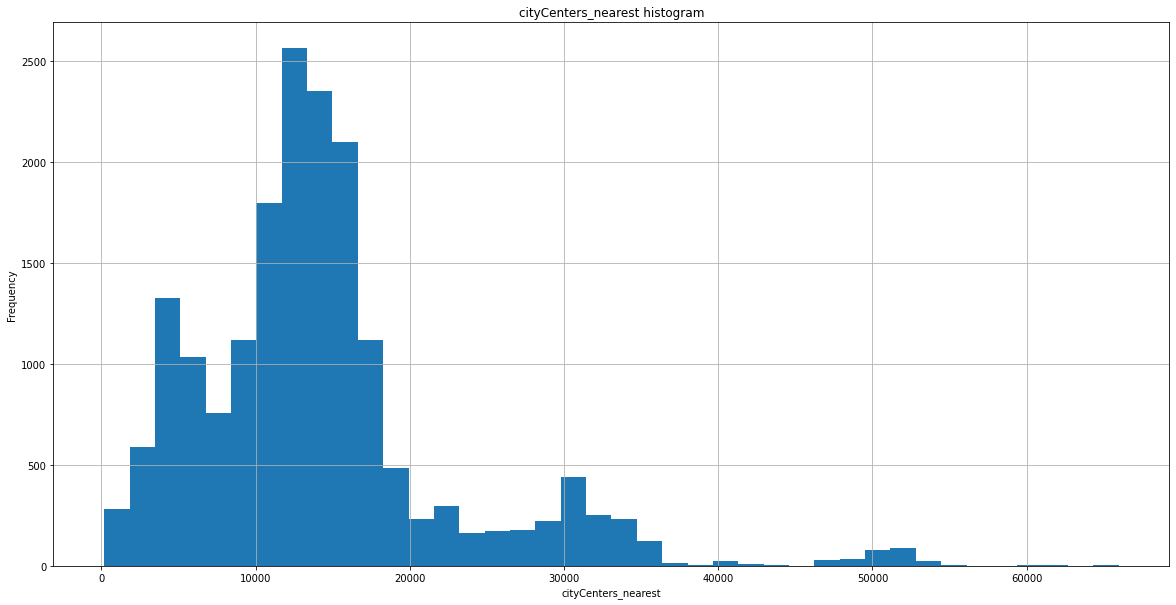

In [55]:
plt.title('cityCenters_nearest histogram')
plt.ylabel('Frequency')
plt.xlabel('cityCenters_nearest')
data['cityCenters_nearest'].hist(bins=40, figsize=(20,10));

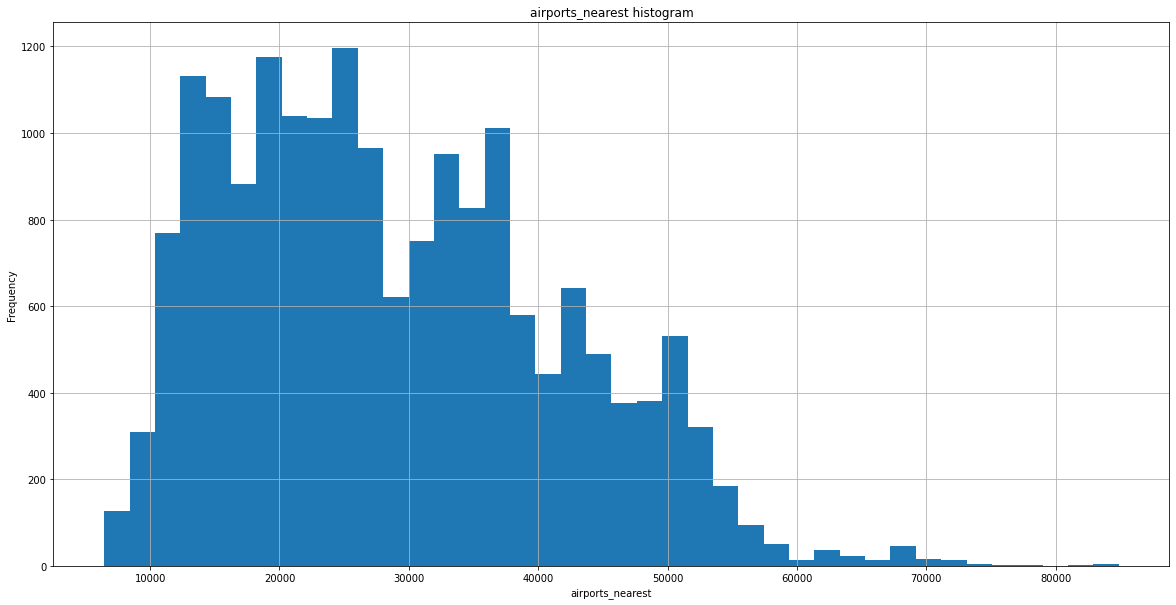

In [56]:
plt.title('airports_nearest histogram')
plt.ylabel('Frequency')
plt.xlabel('airports_nearest')
data['airports_nearest'].hist(bins=40, figsize=(20,10));

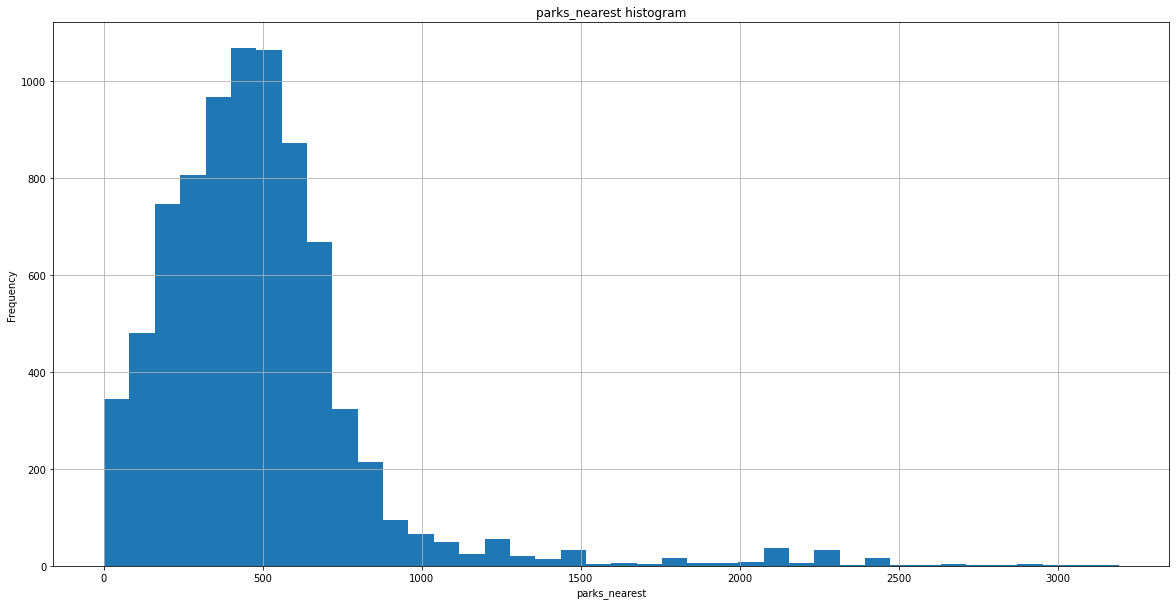

In [57]:
plt.title('parks_nearest histogram')
plt.ylabel('Frequency')
plt.xlabel('parks_nearest')
data['parks_nearest'].hist(bins=40, figsize=(20,10));

В среднем квартиры располагаются в 13 км от центра города, в 26,5 км от аэропорта и в 0,5 км от парка.

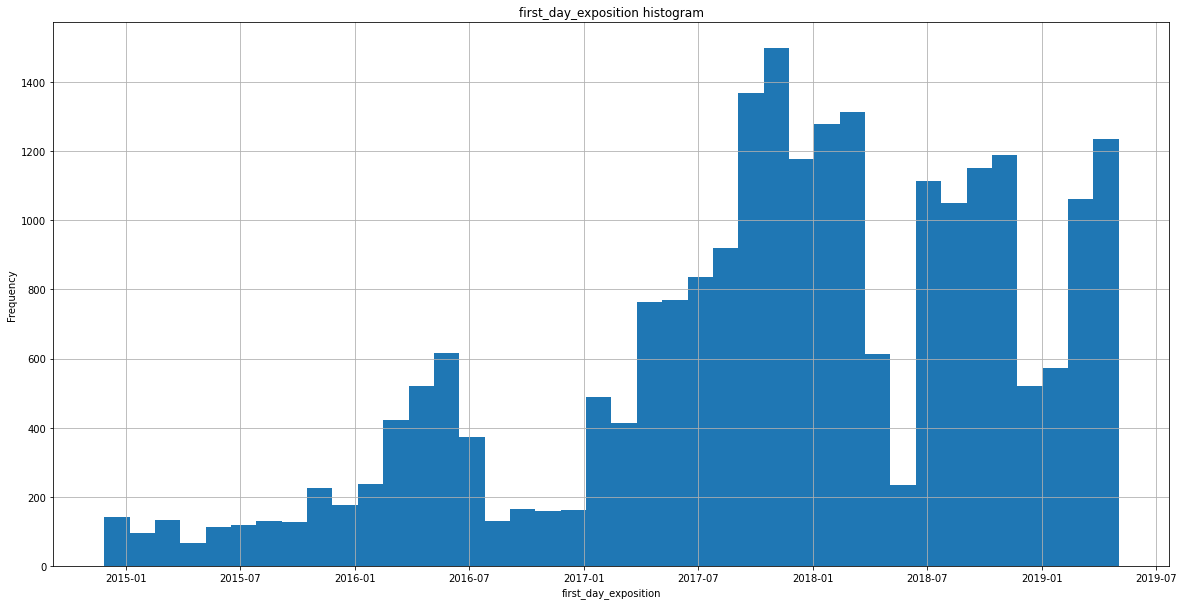

In [58]:
plt.title('first_day_exposition histogram')
plt.ylabel('Frequency')
plt.xlabel('first_day_exposition')
data['first_day_exposition'].hist(bins=40, figsize=(20,10));

Объявления публиковались гораздо чаще начиная с середины 2017 года, в 2018 и в 2019 годах, так как сервис Яндекс.Недвижимость начал сотрудчничать с профессиональными риелторскими агентствами.

### Изучение скорости продажи квартир по данным столбца *days_exposition*

In [59]:
data['days_exposition'].describe()

count    20508.000000
mean       180.812561
std        219.519814
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

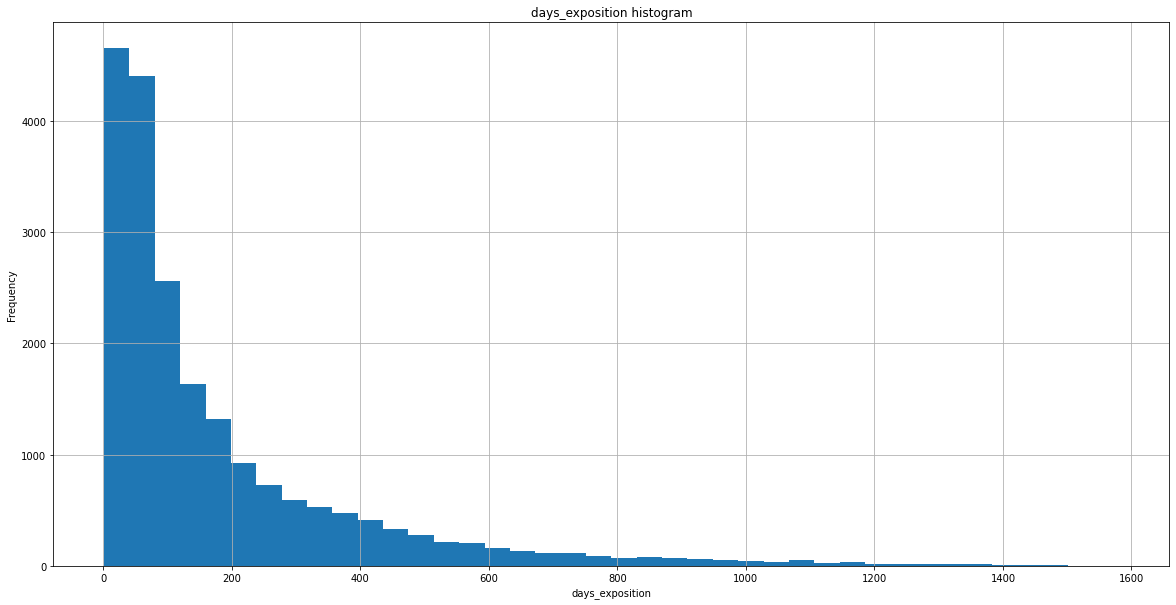

In [60]:
plt.title('days_exposition histogram')
plt.ylabel('Frequency')
plt.xlabel('days_exposition')
data['days_exposition'].hist(bins = 40, figsize=(20, 10));

По гистограмме мы видим, что большее количество квартир продаётся в первые 100 дней с даты публикации объявления. Среднее арфиметическое скорости продажи составляет 181 дней, а медиана скорости продажи - 95 дней. Такая разница между средним и медианой говорит о том, что есть квартиры, которые продавались аномально долгое количество времени. 

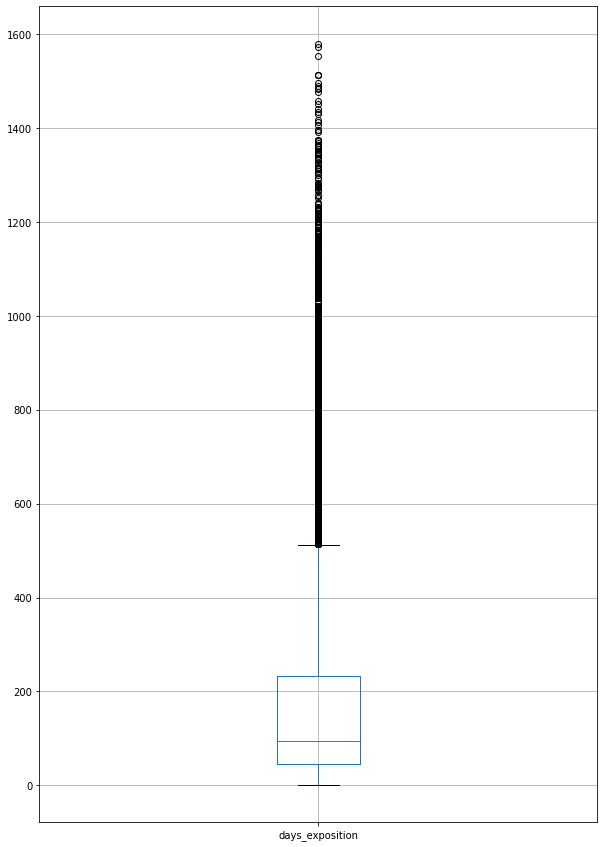

In [61]:
data.boxplot('days_exposition', figsize = (10, 15));

**Вывод:** большинство квартир продаётся в первые 100 дней. Быстрыми можно назвать продажи, которую осуществляются в первые 45 дней. Если квартира не продаётся дольше 500 дней - это аномально долгая скорость продажи.   

### Изучение факторов, которые вляют на стоимость квартиры

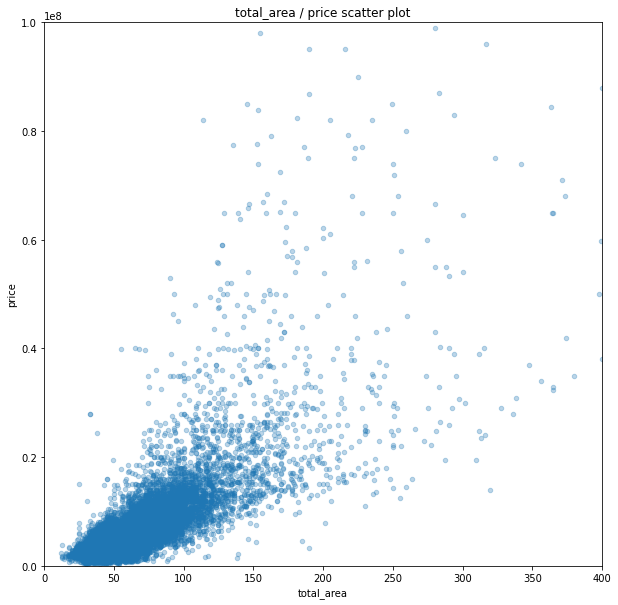

In [62]:
data.plot(
    x='total_area', 
    y='last_price', 
    kind='scatter', 
    alpha=0.3, 
    xlim=(0, 400), 
    ylim=(0, 10**8), 
    figsize=(10, 10),
    ylabel='price',
    title='total_area / price scatter plot'
);

In [63]:
data['last_price'].corr(data['total_area'])

0.6319164665792973

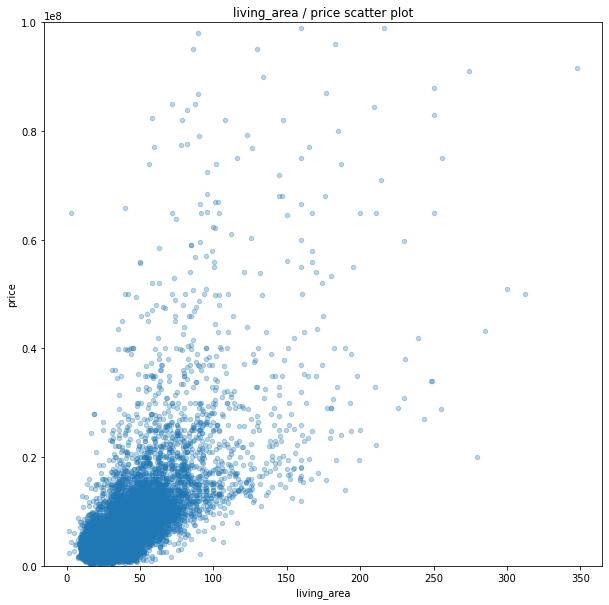

In [64]:
data.plot(
    x='living_area', 
    y='last_price', 
    kind='scatter', 
    alpha=0.3, 
    ylim=(0, 10**8), 
    figsize=(10, 10),
    ylabel='price',
    title='living_area / price scatter plot'
);

In [65]:
data['last_price'].corr(data['living_area'])

0.5718779844167947

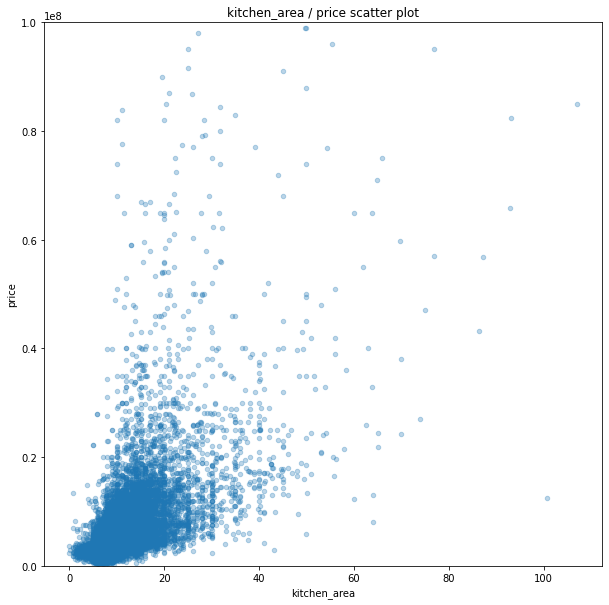

In [66]:
data.plot(
    x='kitchen_area', 
    y='last_price', 
    kind='scatter', 
    alpha=0.3, 
    ylim=(0, 10**8), 
    figsize=(10, 10),
    ylabel='price',
    title='kitchen_area / price scatter plot'
);

In [67]:
data['last_price'].corr(data['kitchen_area'])

0.49216231639336355

**Вывод:** между общей площадью помещения и ценой, а также между жилой площадью и ценой, есть прямая заметная корреляция. При этом, если сопоставлять площадь кухни и цену, то корреляция выражена умеренно.

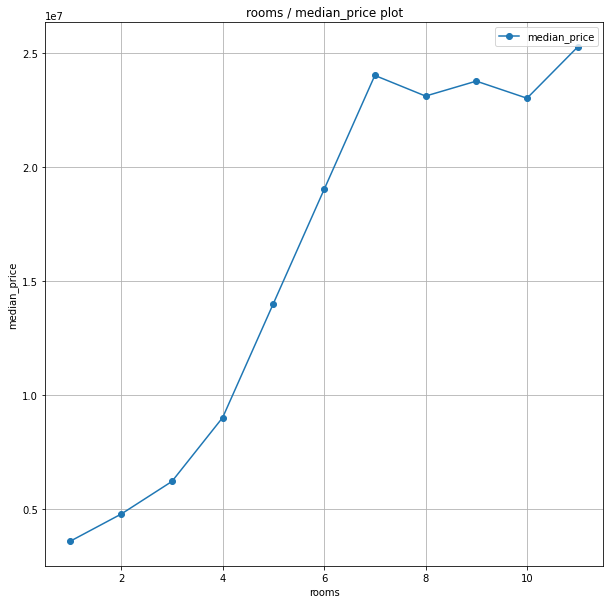

In [68]:
rooms_median_price = data.pivot_table(
    index='rooms', 
    values='last_price', 
    aggfunc='median'
).reset_index()

rooms_median_price.columns = ['rooms', 'median_price']
rooms_median_price.plot(
    x='rooms', 
    y='median_price', 
    style='o-', 
    alpha=1, 
    figsize=(10, 10), 
    grid=True, 
    ylabel='median_price',
    title='rooms / median_price plot'
);

**Вывод:** стоимость квартиры зависит от зависит от количества комнат, что соответствует предыдущему выводу, так как при увеличнии количества комнат часто увеличивается и площадь жилого помещения. При этом начиная с 7 комнат зависимость пропадает, так как при таком количестве комнат, комнаты могут быть как небольшими, так и большими, что значительнее влияет на площать квартиры.

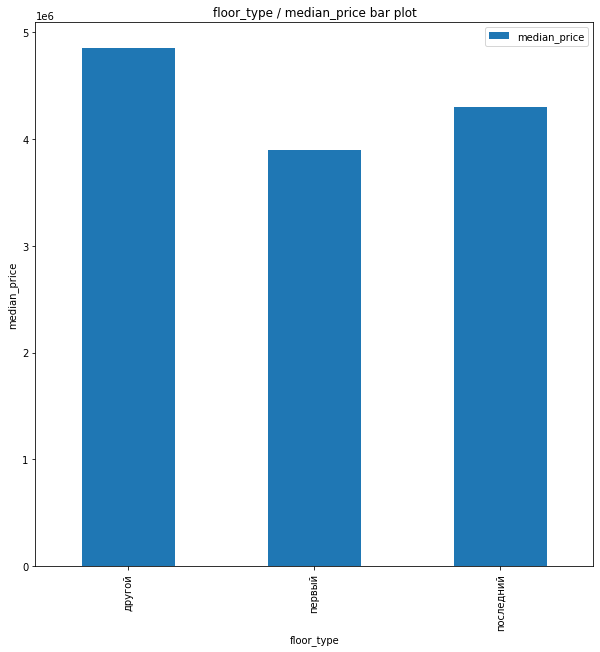

In [69]:
floor_median_price = data.pivot_table(
    index='floor_type', 
    values='last_price', 
    aggfunc='median'
).reset_index()

floor_median_price.columns = ['floor_type', 'median_price']
floor_median_price.plot(
    x='floor_type', 
    y='median_price', 
    kind='bar', 
    alpha=1, 
    figsize=(10, 10), 
    ylabel='median_price',
    title='floor_type / median_price bar plot'
);

In [70]:
floor_median_price

,floor_type,median_price
0,другой,4850000
1,первый,3900000
2,последний,4300000


**Вывод:** при сравнении типа этажа со стоимостью квартиры, самая высокая медианная стоимость у квартир расположенных не на первом и не на последнем этажах. Это связано с тем, что таких объявлений гораздо больше, чем тех, которые предлагают квартиры на первых и последних этажах, и среди этих предложений есть варианты с высокой стоимостью. Кроме того, из-за пропусков в данных не всегда можно сделать вывод о том, что квартира действительно находится на последнем этаже, такие объявления мы занесли в категорию этажа "другой".

Если же сравнивать стоимость квартир на первом и на последнем этаже, явно побеждают квартиры на последнем этаже с медианной стоимостью 4,3 млн против квартир на первом этаже с медианной стоимостью 3,9 млн.

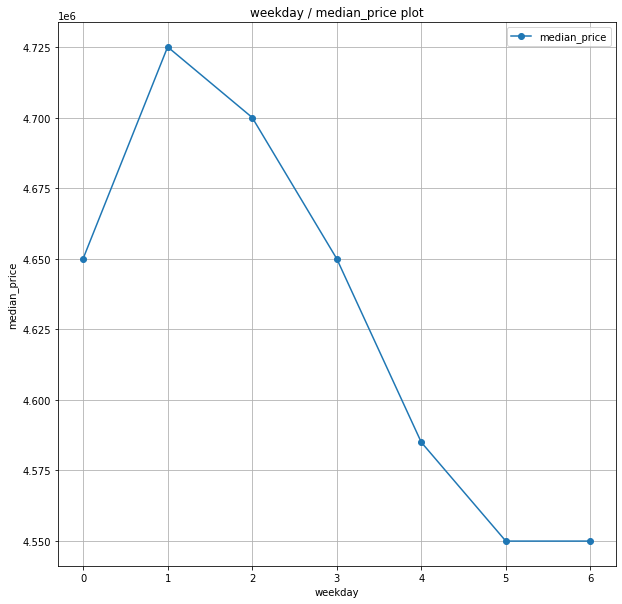

In [71]:
weekday_median_price = data.pivot_table(
    index='weekday_exposition', 
    values='last_price', 
    aggfunc=['median', 'count']
).reset_index()

weekday_median_price.columns = ['weekday', 'median_price', 'quantity']
weekday_median_price.plot(
    x='weekday', 
    y='median_price', 
    style='o-', 
    alpha=1, 
    figsize=(10, 10), 
    grid=True, 
    ylabel='median_price',
    title='weekday / median_price plot'
);

In [72]:
weekday_median_price

,weekday,median_price,quantity
0,0,4650000,3610
1,1,4725000,4182
2,2,4700000,3972
3,3,4650000,4292
4,4,4585000,4000
5,5,4550000,1932
6,6,4550000,1698


**Вывод:** объявления на наболее дорогие объекты чаще всего выкладываются во вторник, и затем со среды по воскресенье стоимость публикуемых объектов постепенно понижается. При этом стоит обратить внимание на то, что в выходные публикуется самое малое количество объявлений, более чем в два раза меньше, чем в любой будний день. Из этого можно сделать вывод, что по будням публикацией объявлений занимаются профессиональные агентства и риелторы, которые часто ведут дорогие объекты недвижимости, а по выходным объявления публикуют в основном обычные пользователи, стоимость квартир которых чаще ниже.

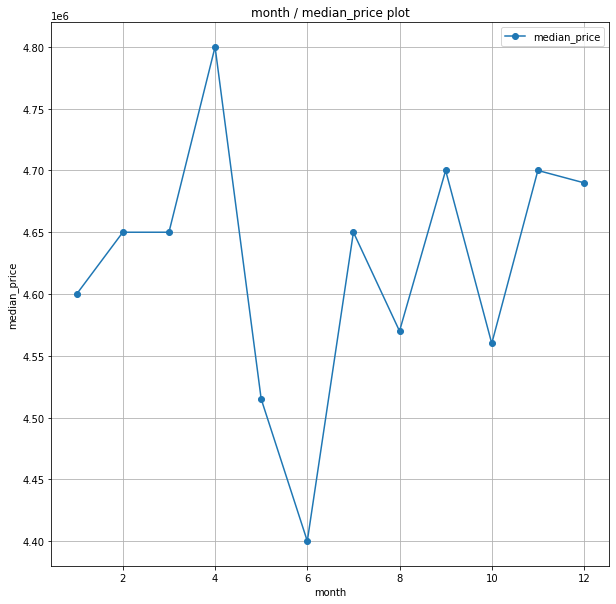

In [73]:
month_median_price = data.pivot_table(
    index='month_exposition', 
    values='last_price', 
    aggfunc=['median', 'count']
).reset_index()

month_median_price.columns = ['month', 'median_price', 'quantity']
month_median_price.plot(
    x='month', 
    y='median_price', 
    style='o-', 
    alpha=1, 
    figsize=(10, 10), 
    grid=True, 
    ylabel='median_price',
    title='month / median_price plot'
);

In [74]:
month_median_price

,month,median_price,quantity
0,1,4600000,1500
1,2,4650000,2639
2,3,4650000,2583
3,4,4800000,2378
4,5,4515000,1274
5,6,4400000,1759
6,7,4650000,1695
7,8,4570000,1744
8,9,4700000,1980
9,10,4560000,2126


**Вывод:** корреляции между стоимостью и месяцем публикации объявления нет, однако мы можем сделать вывод, что в апреле публикуются объявления с наибольшей медианной стоимостью, а в июне медианная стоимость объявлений самая низкая.  

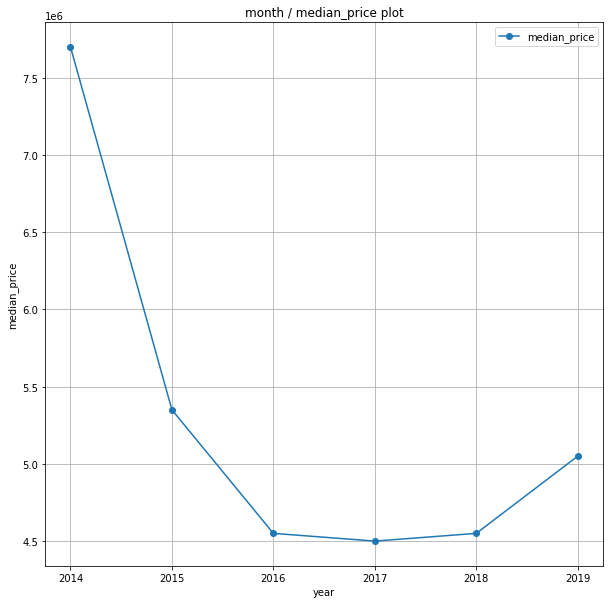

In [75]:
year_median_price = data.pivot_table(
    index='year_exposition', 
    values='last_price', 
    aggfunc=['median', 'count']
).reset_index()

year_median_price.columns = ['year', 'median_price', 'quantity']
year_median_price.plot(
    x='year', 
    y='median_price', 
    style='o-', 
    alpha=1, 
    figsize=(10, 10), 
    grid=True, 
    ylabel='median_price',
    title='month / median_price plot'
);

In [76]:
year_median_price

,year,median_price,quantity
0,2014,7700000,137
1,2015,5350000,1189
2,2016,4550000,2782
3,2017,4500000,8186
4,2018,4550000,8517
5,2019,5050000,2875


In [77]:
data['first_day_exposition'].sort_values().head()

3873    2014-11-27
16159   2014-11-27
15857   2014-11-27
21867   2014-11-27
10132   2014-11-27
Name: first_day_exposition, dtype: datetime64[ns]

**Вывод:** медианная стоимость объявлений в 2014 и 2015 была выше, чем в последнующих годах, при этом и количество объявлений в этих годах значительно ниже. Это связано с тем, что в данных у нас объявления, начиная с конца ноября 2014 года. Количество опубликованных объявлений в 2017 и 2018 годах значительно возрастает в связи с тем, что сервис Яндекс.Недвижимость стал сотрудничать с профессиональными риелторскими агенствами.

### Выявление средней цены за квадратный метр в десяти самых популярных населённых пунктах

In [78]:
top10_locality_list = data['locality_name'].value_counts().head(10)

top10_locality = (
    data.query('locality_name in @top10_locality_list.index')
    .pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'median'])
    .astype('int64')
)
top10_locality.columns = ['ads_quantity', 'price_per_sqm']
top10_locality.sort_values('price_per_sqm', ascending=False)

,ads_quantity,price_per_sqm
locality_name,,
Санкт-Петербург,15708,104761
Пушкин,369,100000
деревня Кудрово,299,91860
поселок Парголово,327,91642
поселок Мурино,556,85878
поселок Шушары,440,76876
Колпино,338,74723
Гатчина,307,67796
Всеволожск,398,65789


**Вывод:** самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, она составляет 104765 р. за квадратный метр. Из этого города у нас 15720 объявлений. Самая низкая цена за квадратный метр в городе Выборг, который находится в 137 км. от Санкт-Петербурга, рядом с границой с Финляндией. Стоимость за квадратный метр там составляет 58158 р., что почти в два раза меньше, чем в Санкт-Петербурге, при общем количестве объявлений 237.

### Изучение влияния близости к центру города на стоимость

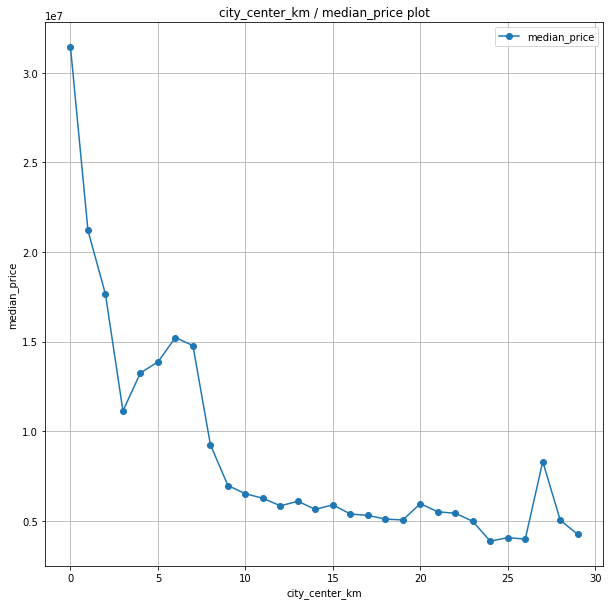

In [79]:
km_median_price = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_km', values='last_price')
    .sort_values('city_center_km')
    .reset_index()
)
km_median_price.columns = ['city_center_km', 'median_price']
km_median_price.plot(
    x='city_center_km', 
    y='median_price', 
    style='o-', 
    alpha=1, 
    figsize=(10, 10), 
    grid=True,
    ylabel='median_price',
    title='city_center_km / median_price plot'
);

**Вывод:** стоимость квартиры зависит от расстояния от дома до центра города, при этом до 3 километра зависимость выражена очень ярко, с 4 по 7 км стоимость объектов держится примерно в одной ценовой категории, и затем до 9 км сильно падает. С 10 км средняя стоимость постепенно уменьшается.

## Общий вывод

Мы провели исследование объявлений о продаже квартир для того, чтобы найти параметры, которые позволят нам научиться определять рыночную стоимость объектов недвижимости. Для этого исследования мы использовали данные Яндекс.Недвижимости о квартирах в Санкт-Петербурге и в ближайших населённых пунктах за период с 2014 по 2019 года.

Для исследования нам была предоставлена таблица данных, состоящая из 23699 строк и 22 колонн. Мы провели предобработку данных, состоящую из работы с пропусками, с неверными типами данных, с дубликатами и с редкими выбивающимися значениями. Во время предобработки данных для целей нашего исследования мы удалили из оригинальной таблицы 1% данных.

Средняя квартира, выставленная на продажу, стоит 4,65 млн, имеет общую площадь 52 кв. метра, состоит из двух комнат с высотой потолков 2,65 м, находится на 4 этаже девятиэтажного дома. Этот дом располагается в 13 км от центра города, в 27 км от аэропорта и половине километра от ближайшего парка. В среднем квартира продаётся за 95 дней с даты публикации объявления.

Стоимость квартиры зависит от набора факторов, наиболее заметным из которых является общая площадь помещения, два эти фактора имеют среднюю положительную корреляцию. Эта корреляция менее заметна, но всё же присутствует между стоимостью и отдельно жилой площадью или площадью кухни. 

Стоимость зависит от количества комнат, причём до седьмой комнаты корреляция ярко выражена, а после корреляция отсутствует, так как комнаты могут быть маленькими или большими, что влияет на общую площадь квартиры.

Квартира на последнем этаже будет стоить больше, чем такая же квартира, но на первом этаже.

Мы также выяснили, что квартиры разной стоимости публикуются в разное время, например, самые дорогие варианты чаще всего публикуются по вторникам в апреле. Самые недорогие варианты публикуются по выходным в июне.

Из десяти самых популярных населённых пунктов самая высокая средняя цена за квадратный метр у Санкт-Петербурга - 104765 р. Самая низкая цена у Выборга - 58158 р.

Стоимость квартиры также зависит от расстояния до центра города, при этом в первых 9 км есть большая разнице в цене за каждый километр, чем ближе к центру города, тем значительно выше стоимость квартиры. Начиная с 10 км, стоимость квартир уменьшается очень постепенно за каждый километр.